In [1]:
from datetime import datetime, timedelta
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotly.offline as pyoff
import plotly.graph_objs as go 

In [2]:
#df_retail = pd.read_csv('C:\\Users\\LU VINH XUYEN\\Downloads\\OnlineRetail.csv')
df_retail = pd.read_csv('C:\\Users\\LU VINH XUYEN\\Downloads\\onlineretail.csv',  encoding='latin-1')
df_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Convert InvoiceDate to 'datetime'
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#Extract year & month
df_retail['year'] = df_retail['InvoiceDate'].dt.year
df_retail['month'] = df_retail['InvoiceDate'].dt.month
df_retail['InvoiceYearMonth'] = df_retail['InvoiceDate'].dt.strftime('%Y%m')

#df_retail.head(5)

In [5]:
#Calculate revenue = unitprice * quantity
df_retail['Revenue'] = df_retail['UnitPrice']* df_retail['Quantity']

Monthly Growth rate by revenue ?

In [6]:
df_revenue = df_retail.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

In [7]:
pct_change_list = [0] #If only run loop, the result has only 12 values because pct_change start calculate ion the second value. So must make a '0' value to match with df_revenue
for i in range(len(df_revenue)-1): #Because this df has 13 rows but start at 0
    pct_change = (df_revenue['Revenue'][i+1] - df_revenue['Revenue'][i])/df_revenue['Revenue'][i]
    pct_change_list.append(pct_change)
print(pct_change_list)

[0, -0.252293195676302, -0.110602823648689, 0.37184966590046437, -0.278163495012814, 0.4665917810217506, -0.04453048221144906, -0.014213110104028877, 0.002026124724937812, 0.4936527512701365, 0.05003203618372446, 0.36522823796033327, -0.7033239912605128]


In [8]:
df_revenue['pct_change'] = pct_change_list

In [9]:
plot_data = [
    go.Scatter(
        x= df_revenue[df_revenue['InvoiceYearMonth'] !='201112']['InvoiceYearMonth'],
        y= df_revenue[df_revenue['pct_change'] != '201112']['pct_change'],)
]    

plot_layout = go.Layout(
    xaxis= {"type":"category"},
    title = 'Monthly Growth Rate')

fig = go.Figure(data=plot_data, layout = plot_layout)
pyoff.plot(fig)


'temp-plot.html'

Monthly Active Customers

In [10]:
df_retail['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

United Kingdom has overwhelming numbers of active, so we focus on this country

In [11]:
df_uk = df_retail[df_retail['Country'] =='United Kingdom'].reset_index(drop = True) # can't using inplace

In [12]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [13]:
plot_data = [
    go.Bar(
        x= df_monthly_active['InvoiceYearMonth'],
        y= df_monthly_active['CustomerID'],
                             ) 
]    

plot_layout = go.Layout(
    xaxis= {"type":"category"},
    title = 'Monthly Active Customers')

fig = go.Figure(data=plot_data, layout = plot_layout)
pyoff.plot(fig)


'temp-plot.html'

What is average of products sold and revenue by month ? 

In [14]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
df_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


In [15]:
plot_data = [
    go.Scatter(
        x= df_monthly_sales['InvoiceYearMonth'] ,
        y= df_monthly_sales['Quantity'] ,)
]    

plot_layout = go.Layout(
    xaxis= {"type":"category"},
    title = 'Monthly Sold Products')

fig = go.Figure(data=plot_data, layout = plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [16]:
mean_quantity = df_monthly_sales['Quantity'].mean()
mean_quantity = round(mean_quantity,2)
mean_quantity

327986.85

Above is the result for mean of sold products 

In [17]:
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index() 
df_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


Above is the result for the average of revenue by month

Find New & Existing Customers

In [18]:
#Find minimum of Invoice date for each customers
df_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

In [19]:
df_min_purchase.columns= ['CustomerID' , 'MinPurchase']
df_min_purchase

,CustomerID,MinPurchase
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [20]:
df_min_purchase['MinPurchasedYearMonth'] = df_min_purchase['MinPurchase'].map(lambda x: x.year*100 + x.month) #Other way to extract & concat year - month

In [21]:
#Join df_min_purchase with df_uk
df_uk = pd.merge(df_uk, df_min_purchase, on ='CustomerID') 
df_uk 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,InvoiceYearMonth,Revenue,MinPurchase,MinPurchasedYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,201112,2.95,2011-12-08 14:58:00,201112
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,2011,12,201112,2.50,2011-12-08 14:58:00,201112
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,2011,12,201112,2.10,2011-12-08 14:58:00,201112
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,201112,5.90,2011-12-08 14:58:00,201112


In [22]:
#df_uk.loc[df_uk['InvoiceYearMonth'] == df_uk['MinPurchasedYearMonth'],'UserType' ] = 'New' 
#df_uk.loc[df_uk['InvoiceYearMonth'] != df_uk['MinPurchasedYearMonth'],'UserType' ] = 'Existing' 
# failed, try if else
df_uk.info()
# I saw the format of 2 columns that try to compare is not match, so must convert 1 of 2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 361877
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              361878 non-null  object        
 1   StockCode              361878 non-null  object        
 2   Description            361878 non-null  object        
 3   Quantity               361878 non-null  int64         
 4   InvoiceDate            361878 non-null  datetime64[ns]
 5   UnitPrice              361878 non-null  float64       
 6   CustomerID             361878 non-null  float64       
 7   Country                361878 non-null  object        
 8   year                   361878 non-null  int64         
 9   month                  361878 non-null  int64         
 10  InvoiceYearMonth       361878 non-null  object        
 11  Revenue                361878 non-null  float64       
 12  MinPurchase            361878 non-null  date

In [23]:
df_uk['InvoiceYearMonth'] = pd.to_numeric(df_retail['InvoiceYearMonth'])


In [24]:
def compare_and_label(row):
  if row['InvoiceYearMonth'] == row['MinPurchasedYearMonth']:
    return 'New'
  else:
    return 'Existing'

# Apply the function to each row and create a new column
df_uk['New_Existing'] = df_uk.apply(compare_and_label, axis=1)

print(df_uk)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
361873    581416     22809              SET OF 6 T-LIGHTS SANTA         1   
361874    581416     22807         SET OF 6 T-LIGHTS TOADSTOOLS         2   
361875    581416    72349B      SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
361876    581416     22809              SET OF 6 T-LIGHTS SANTA         2   
361877    581416     23487             SWEET HEART CAKE CARRIER         1   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \


In [25]:
df_uk['New_Existing'].value_counts()

Existing    295058
New          66820
Name: New_Existing, dtype: int64

In [26]:
df_uk = df_uk.rename(columns={'New_Exisiting': 'UserType'})
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,InvoiceYearMonth,Revenue,MinPurchase,MinPurchasedYearMonth,New_Existing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New


In [27]:
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth','New_Existing'])['Revenue'].sum().reset_index()

In [28]:
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth!= 201112")
#Exclude first and last month

In [29]:
plot_data = [
    go.Scatter(
    x=df_user_type_revenue.query("New_Existing == 'Existing'")['InvoiceYearMonth'],
    y=df_user_type_revenue.query("New_Existing == 'Existing'")['Revenue'],
    name = 'Existing'),
    go.Scatter(
    x=df_user_type_revenue.query("New_Existing == 'New'")['InvoiceYearMonth'],
    y=df_user_type_revenue.query("New_Existing == 'New'")['Revenue'],
    name = 'New')
]

plot_layout = go.Layout(
    xaxis={"type":"category"},
    title='Revenue of New vs Existing Customers')

fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig)

'temp-plot.html'

Monthly New Customers Ratio

In [30]:
countNew = df_uk.query("New_Existing == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

In [31]:
countNew

InvoiceYearMonth
201012    177
201108    133
201109    275
Name: CustomerID, dtype: int64

In [32]:
countExisting = df_uk.query("New_Existing == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

In [33]:
df_user_ratio = countNew/countExisting
df_user_ratio

InvoiceYearMonth
201012         NaN
201101         NaN
201102         NaN
201103         NaN
201104         NaN
201105         NaN
201106         NaN
201107         NaN
201108    0.288503
201109    0.419207
Name: CustomerID, dtype: float64

In [34]:
df_user_ratiov = df_user_ratio.dropna()

In [35]:
df_user_ratiov = df_user_ratiov.reset_index()
df_user_ratiov

,InvoiceYearMonth,CustomerID
0,201108,0.288503
1,201109,0.419207


In [36]:
plot_data = [
    go.Bar(
        x=df_user_ratiov['InvoiceYearMonth'],
        y=df_user_ratiov['CustomerID'],)
]

plot_layout = go.Layout(
    xaxis = {"type" :"category"},
    title = 'New Customers Ratio')

fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig)

'temp-plot.html'

Monthly Retention Rate 

In [37]:
df_uk['InvoiceYearMonth'] = df_uk['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [38]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [39]:
df_user_purchase = df_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()
df_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771
...,...,...,...
12325,18283.0,201110,114
12326,18283.0,201111,651
12327,18283.0,201112,208
12328,18287.0,201105,765


In [40]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()

In [41]:
months = df_retention.columns
months

Index(['CustomerID',       201012,       201101,       201102,       201103,
             201104,       201105,       201106,       201107,       201108,
             201109,       201110,       201111,       201112],
      dtype='object', name='InvoiceYearMonth')

The table is resulted by customer_id and invoiceyearmonth, if value is 0, the customer didn't buy in this month

In [42]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i] 
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]==1) & (df_retention[prev_month]==1)][selected_month].sum()
    retention_array.append(retention_data)
    print("*******" + str(selected_month) + "*******") 
    print(retention_array)
    #Make an array can show value by month, include previous month

*******201012*******
[{'InvoiceYearMonth': 201012, 'TotalUserCount': 871, 'RetainedUserCount': 0}]
*******201101*******
[{'InvoiceYearMonth': 201012, 'TotalUserCount': 871, 'RetainedUserCount': 0}, {'InvoiceYearMonth': 201101, 'TotalUserCount': 684, 'RetainedUserCount': 322}]
*******201102*******
[{'InvoiceYearMonth': 201012, 'TotalUserCount': 871, 'RetainedUserCount': 0}, {'InvoiceYearMonth': 201101, 'TotalUserCount': 684, 'RetainedUserCount': 322}, {'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}]
*******201103*******
[{'InvoiceYearMonth': 201012, 'TotalUserCount': 871, 'RetainedUserCount': 0}, {'InvoiceYearMonth': 201101, 'TotalUserCount': 684, 'RetainedUserCount': 322}, {'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305}]
*******201104*******
[{'InvoiceYearMonth': 201012, 'TotalUserCount': 871, 'RetainedUserCount': 0}, {'InvoiceYearMonth': 201101, 'T

In [43]:
df_retention = pd.DataFrame(retention_array)
df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201012,871,0
1,201101,684,322
2,201102,714,263
3,201103,923,305
4,201104,817,310
5,201105,985,369
6,201106,943,417
7,201107,899,379
8,201108,867,391
9,201109,1177,417


In 201101, there are 322 customers in 201012 still had purchase. Similar to the remaining months

In [44]:
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201012,871,0,0.000000
1,201101,684,322,0.470760
2,201102,714,263,0.368347
3,201103,923,305,0.330444
4,201104,817,310,0.379437
5,201105,985,369,0.374619
6,201106,943,417,0.442206
7,201107,899,379,0.421580
8,201108,867,391,0.450980
9,201109,1177,417,0.354291


In [45]:
plot_data = [
    go.Scatter(
    x= df_retention['InvoiceYearMonth'],
    y= df_retention['RetentionRate'],
    name='organic'
    )
]

plot_layout = go.Layout(
    xaxis = {"type":"category"},
    title = 'Monthly Retention Rate')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig)

'temp-plot.html'

Churn rate

In [46]:
df_retention['ChurnRate'] = 1 - df_retention['RetentionRate']
df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate,ChurnRate
0,201012,871,0,0.000000,1.000000
1,201101,684,322,0.470760,0.529240
2,201102,714,263,0.368347,0.631653
3,201103,923,305,0.330444,0.669556
4,201104,817,310,0.379437,0.620563
5,201105,985,369,0.374619,0.625381
6,201106,943,417,0.442206,0.557794
7,201107,899,379,0.421580,0.578420
8,201108,867,391,0.450980,0.549020
9,201109,1177,417,0.354291,0.645709


In [47]:
plot_data = [
    go.Scatter(
    x= df_retention.query("InvoiceYearMonth>201101")['InvoiceYearMonth'],
    y= df_retention.query("InvoiceYearMonth>201101")['ChurnRate'],
    name='organic'
    )
]

plot_layout = go.Layout(
    xaxis = {"type":"category"},
    title = 'Monthly Churn Rate')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig)
#Exclude month 201012

'temp-plot.html'

Cohort analysis rate

In [48]:
df_min_purchase.head(5)

,CustomerID,MinPurchase,MinPurchasedYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [49]:
df_min_purchase['MinPurchasedYearMonth'] = df_min_purchase['MinPurchase'].map(lambda date: 100*date.year + date.month)

In [50]:
df_retention.head(5)

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate,ChurnRate
0,201012,871,0,0.000000,1.000000
1,201101,684,322,0.470760,0.529240
2,201102,714,263,0.368347,0.631653
3,201103,923,305,0.330444,0.669556
4,201104,817,310,0.379437,0.620563


In [51]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()

In [52]:
df_retention = pd.merge(df_retention, df_min_purchase[['CustomerID','MinPurchasedYearMonth']], on = 'CustomerID')
df_retention

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchasedYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [53]:
months = df_retention.columns[2:]

In [54]:
months =df_retention.columns[1:-1]
months

Index([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111, 201112],
      dtype='object')

In [55]:
months[0]

201012

In [56]:
selected_months = months[4]
selected_months

201104

In [57]:
total_user_count = df_retention[df_retention['MinPurchasedYearMonth'] ==201101]['MinPurchasedYearMonth'].count()

In [58]:
total_user_count

362

In [59]:
new_column_names = ['m_' + str(column) for column in df_retention.columns[1:-1]] 
new_column_names.append('CustomerID')
new_column_names.append('MinPurchasedYearMonth') 
df_retention.columns = new_column_names

In [60]:
df_retention.query("MinPurchasedYearMonth ==201101 and {} ==1".format(str('m_' +str(201104))))['m_' +str(201104)].sum()/total_user_count

0.27900552486187846

In [61]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan #All values of prev month is NaN
        
    total_user_count = df_retention[df_retention['MinPurchasedYearMonth'] == selected_month]['MinPurchasedYearMonth'].count()
    retention_data['TotalUserCount'] = total_user_count 
    retention_data[selected_month] =1
    
    query = "MinPurchasedYearMonth == {}".format(selected_month) 
    
    for next_month in next_months:
        new_query = query + "and {} >0".format(str('m_' +str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)

In [62]:
df_retention

,TotalUserCount,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,871,1.0,1.0,0.37,0.33,0.38,0.35,0.40,0.38,0.35,0.35,0.40,0.37,0.49
1,362,NaN,1.0,1.00,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36
2,339,NaN,NaN,1.00,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31
3,408,NaN,NaN,NaN,1.00,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29
4,276,NaN,NaN,NaN,NaN,1.00,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26
5,252,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.23,0.17,0.17,0.21,0.24,0.27
6,207,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.21,0.16,0.25,0.26,0.32
7,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.20,0.19,0.23,0.28
8,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.26,0.23,0.26
9,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.29,0.33


# Customer Segmentation - Using RFM

In [63]:
from sklearn.cluster import KMeans
from datetime import datetime, timedelta, date  


In [64]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         541909 non-null  object        
 1   StockCode         541909 non-null  object        
 2   Description       540455 non-null  object        
 3   Quantity          541909 non-null  int64         
 4   InvoiceDate       541909 non-null  datetime64[ns]
 5   UnitPrice         541909 non-null  float64       
 6   CustomerID        406829 non-null  float64       
 7   Country           541909 non-null  object        
 8   year              541909 non-null  int64         
 9   month             541909 non-null  int64         
 10  InvoiceYearMonth  541909 non-null  object        
 11  Revenue           541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 49.6+ MB


In [65]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 361877
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              361878 non-null  object        
 1   StockCode              361878 non-null  object        
 2   Description            361878 non-null  object        
 3   Quantity               361878 non-null  int64         
 4   InvoiceDate            361878 non-null  datetime64[ns]
 5   UnitPrice              361878 non-null  float64       
 6   CustomerID             361878 non-null  float64       
 7   Country                361878 non-null  object        
 8   year                   361878 non-null  int64         
 9   month                  361878 non-null  int64         
 10  InvoiceYearMonth       361878 non-null  int64         
 11  Revenue                361878 non-null  float64       
 12  MinPurchase            361878 non-null  date

In [66]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate']).dt.date

In [67]:
df_3m = df_uk[(df_uk.InvoiceDate < date(2011,6,1)) & (df_uk.InvoiceDate >= date(2011,3,1))].reset_index()

In [68]:
df_user = pd.DataFrame(df_3m['CustomerID'].unique()) 

In [69]:
df_user.columns = ['CustomerID']

In [70]:
df_max_purchase = df_3m.groupby('CustomerID').InvoiceDate.max().reset_index()

In [71]:
df_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']
df_max_purchase

,CustomerID,MaxPurchaseDate
0,12747.0,2011-05-25
1,12748.0,2011-05-31
2,12749.0,2011-05-23
3,12821.0,2011-05-09
4,12823.0,2011-03-30
...,...,...
1835,18272.0,2011-05-11
1836,18273.0,2011-03-27
1837,18280.0,2011-03-07
1838,18283.0,2011-05-23


In [72]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

In [73]:
df_max_purchase

,CustomerID,MaxPurchaseDate,Recency
0,12747.0,2011-05-25,6
1,12748.0,2011-05-31,0
2,12749.0,2011-05-23,8
3,12821.0,2011-05-09,22
4,12823.0,2011-03-30,62
...,...,...,...
1835,18272.0,2011-05-11,20
1836,18273.0,2011-03-27,65
1837,18280.0,2011-03-07,85
1838,18283.0,2011-05-23,8


In [74]:
#Join with df_user
df_user = pd.merge(df_user, df_max_purchase[['CustomerID','Recency']], on = 'CustomerID')

In [75]:
df_user.Recency.describe()

count    1840.000000
mean       35.338043
std        26.220317
min         0.000000
25%        12.000000
50%        26.000000
75%        56.000000
max        91.000000
Name: Recency, dtype: float64

In [76]:
plot_data = [
    go.Histogram(
        x=df_user['Recency'])
]
plot_layout = go.Layout(
    title = 'Recency')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig) 

'temp-plot.html'

In range recency = [5,15] has the most of customers

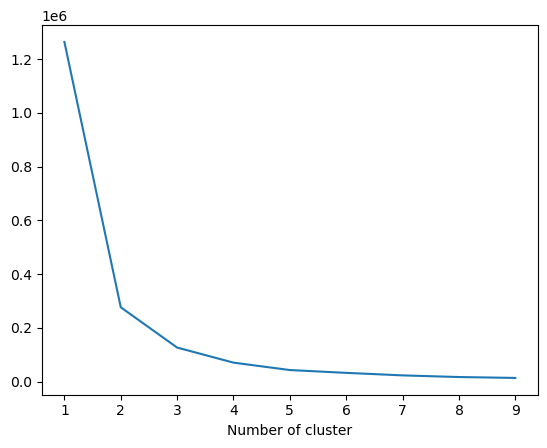

In [77]:
sse = {}
df_recency = df_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency) #max_iter : Number of loops that we want to run
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [78]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

df_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,444.0,24.581081,4.960358,18.0,20.0,23.0,27.00,35.0
1,350.0,77.017143,8.385398,64.0,70.0,76.0,84.75,91.0
2,608.0,8.501645,4.397843,0.0,5.0,8.0,12.00,16.0
3,438.0,50.189498,7.298674,40.0,43.0,49.0,56.00,63.0


In [79]:
#Sort follow by recencycluster and mean 
df_new = df_user.groupby('RecencyCluster')['Recency'].mean().reset_index()
df_new = df_new.sort_values(by='Recency', ascending = False).reset_index(drop=True)
df_new['index'] = df_new.index 
df_user = pd.merge(df_user, df_new[['RecencyCluster','index']], on = 'RecencyCluster')
df_user = df_user.drop(['RecencyCluster'], axis=1)
df_user = df_user.rename(columns={"index":"RecencyCluster"})

In [80]:
df_user

,CustomerID,Recency,RecencyCluster
0,13047.0,27,2
1,17809.0,25,2
2,17548.0,25,2
3,13448.0,21,2
4,14307.0,27,2
...,...,...,...
1835,13760.0,64,0
1836,17749.0,64,0
1837,15068.0,64,0
1838,14538.0,64,0


In [81]:
# Frequency 
# Count how many times does customers buy 
df_frequency = df_3m.groupby('CustomerID').InvoiceDate.count().reset_index()

In [82]:
df_frequency.columns= ['CustomerID', 'Frequency']

In [83]:
df_user = pd.merge(df_user,df_frequency, on='CustomerID')
df_user

,CustomerID,Recency,RecencyCluster,Frequency
0,13047.0,27,2,42
1,17809.0,25,2,3
2,17548.0,25,2,10
3,13448.0,21,2,38
4,14307.0,27,2,28
...,...,...,...,...
1835,13760.0,64,0,28
1836,17749.0,64,0,22
1837,15068.0,64,0,39
1838,14538.0,64,0,3


In [84]:
plot_data = [
    go.Histogram(
        x=df_user.query('Frequency<1000')['Frequency'])
]

plot_layout = go.Layout(
    title = 'Frequency')
fig = go.Figure(data = plot_data, layout= plot_layout) 
pyoff.plot(fig) 

'temp-plot.html'

Numbers of time that customers buy often from under 100

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2450344160.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2450344160.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2450344160.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

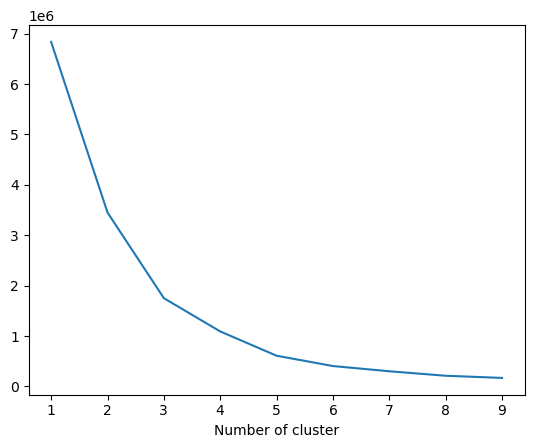

In [85]:
sse = {}
df_frequency = df_user[['Frequency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency) #max_iter : Number of loops that we want to run
    df_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [86]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

In [87]:
df_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1605.0,24.218069,17.761893,1.0,10.0,20.0,36.0,70.0
1,223.0,116.560538,43.816927,71.0,83.5,104.0,131.5,285.0
2,1.0,1364.000000,NaN,1364.0,1364.0,1364.0,1364.0,1364.0
3,11.0,496.000000,125.912668,331.0,422.5,452.0,570.0,730.0


In [88]:
#Sort follow by frecquencycluster and mean 
df_new = df_user.groupby('FrequencyCluster')['Frequency'].mean().reset_index()
df_new = df_new.sort_values(by='Frequency', ascending = True).reset_index(drop=True)
df_new['index'] = df_new.index 
df_user = pd.merge(df_user, df_new[['FrequencyCluster','index']], on = 'FrequencyCluster')
df_user = df_user.drop(['FrequencyCluster'], axis=1)
df_user = df_user.rename(columns={"index":"FrequencyCluster"})

In [89]:
df_user 

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13047.0,27,2,42,0
1,17809.0,25,2,3,0
2,17548.0,25,2,10,0
3,13448.0,21,2,38,0
4,14307.0,27,2,28,0
...,...,...,...,...,...
1835,15005.0,5,3,345,2
1836,14769.0,9,3,558,2
1837,13263.0,6,3,730,2
1838,14056.0,5,3,331,2


In [90]:
#Monetary
df_3m['Revenue'] = df_3m['UnitPrice'] * df_3m['Quantity']

In [91]:
df_revenue_3m = df_3m.groupby('CustomerID').Revenue.sum().reset_index()

In [92]:
df_user = pd.merge(df_user, df_revenue_3m, on='CustomerID')
df_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13047.0,27,2,42,0,831.10
1,17809.0,25,2,3,0,789.00
2,17548.0,25,2,10,0,0.00
3,13448.0,21,2,38,0,590.77
4,14307.0,27,2,28,0,424.42
...,...,...,...,...,...,...
1835,15005.0,5,3,345,2,1790.96
1836,14769.0,9,3,558,2,4966.36
1837,13263.0,6,3,730,2,3149.09
1838,14056.0,5,3,331,2,2695.07


In [93]:
plot_data = [
    go.Histogram(
        x=df_user.query('Revenue<10000')['Revenue'])
]

plot_layout = go.Layout(
    title = 'Monetary Value')
fig = go.Figure(data = plot_data, layout= plot_layout) 
pyoff.plot(fig) 

'temp-plot.html'

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1407342479.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1407342479.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1407342479.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

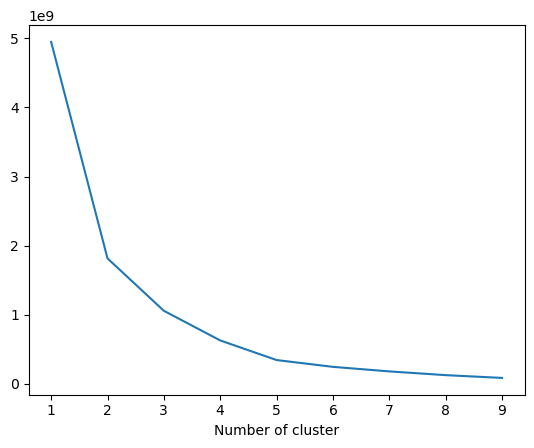

In [94]:
sse = {}
df_revenue_3m = df_user[['Revenue']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue_3m) #max_iter : Number of loops that we want to run
    df_revenue_3m["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [95]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(df_user[['Revenue']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])

In [96]:
#Sort follow by frecquencycluster and mean 
df_new = df_user.groupby('RevenueCluster')['Revenue'].mean().reset_index()
df_new = df_new.sort_values(by='Revenue', ascending = True).reset_index(drop=True)
df_new['index'] = df_new.index 
df_user = pd.merge(df_user, df_new[['RevenueCluster','index']], on = 'RevenueCluster')
df_user = df_user.drop(['RevenueCluster'], axis=1)
df_user = df_user.rename(columns={"index":"RevenueCluster"})

In [97]:
df_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13047.0,27,2,42,0,831.10,0
1,17809.0,25,2,3,0,789.00,0
2,17548.0,25,2,10,0,0.00,0
3,13448.0,21,2,38,0,590.77,0
4,14307.0,27,2,28,0,424.42,0
...,...,...,...,...,...,...,...
1835,14298.0,27,2,433,2,14984.73,2
1836,15311.0,4,3,522,2,16309.61,2
1837,13089.0,5,3,452,2,11757.87,2
1838,17450.0,0,3,47,0,35085.48,3


Overall Segmentation

In [98]:
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] +df_user['RevenueCluster']
df_user 

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,13047.0,27,2,42,0,831.10,0,2
1,17809.0,25,2,3,0,789.00,0,2
2,17548.0,25,2,10,0,0.00,0,2
3,13448.0,21,2,38,0,590.77,0,2
4,14307.0,27,2,28,0,424.42,0,2
...,...,...,...,...,...,...,...,...
1835,14298.0,27,2,433,2,14984.73,2,6
1836,15311.0,4,3,522,2,16309.61,2,7
1837,13089.0,5,3,452,2,11757.87,2,7
1838,17450.0,0,3,47,0,35085.48,3,6


In [99]:
df_user.groupby('OverallScore')['Recency', 'Frequency', 'Revenue'].mean()

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\3981392713.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,77.137725,18.494012,285.846078
1,51.162291,24.448687,370.956874
2,26.818182,30.765550,493.844187
3,10.521649,36.298969,616.318495
4,9.043860,96.456140,1990.659219
5,6.764706,121.509804,3288.066863
6,7.687500,329.125000,10894.470000
7,3.000000,779.333333,11350.896667


In [100]:
df_user['Segment'] = 'Low Value'
df_user.loc[df_user['OverallScore']>2, 'Segment'] = 'Mid Value'
df_user.loc[df_user['OverallScore']>4, 'Segment'] = 'High Value'

In [101]:
df_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13047.0,27,2,42,0,831.10,0,2,Low Value
1,17809.0,25,2,3,0,789.00,0,2,Low Value
2,17548.0,25,2,10,0,0.00,0,2,Low Value
3,13448.0,21,2,38,0,590.77,0,2,Low Value
4,14307.0,27,2,28,0,424.42,0,2,Low Value
...,...,...,...,...,...,...,...,...,...
1835,14298.0,27,2,433,2,14984.73,2,6,High Value
1836,15311.0,4,3,522,2,16309.61,2,7,High Value
1837,13089.0,5,3,452,2,11757.87,2,7,High Value
1838,17450.0,0,3,47,0,35085.48,3,6,High Value


In [102]:
#Visualize
df_graph = df_user.query("Revenue < 50000 and Frequency < 2000") 

plot_data = [
    go.Scatter(
        x=df_graph.query("Segment =='Low Value'")['Frequency'],
        y=df_graph.query("Segment =='Low Value'")['Revenue'],
        mode = 'markers',
        name = 'Low',
        marker=dict(size=7,
                   line=dict(width=1),
                   color='blue',
                   opacity=0.8)
    ),
        go.Scatter(
        x=df_graph.query("Segment =='Mid Value'")['Frequency'],
        y=df_graph.query("Segment =='Mid Value'")['Revenue'],
        mode = 'markers',
        name = 'Mid',
        marker=dict(size=7,
                   line=dict(width=1),
                   color='green',
                   opacity=0.5)
    ),
            go.Scatter(
        x=df_graph.query("Segment =='High Value'")['Frequency'],
        y=df_graph.query("Segment =='High Value'")['Revenue'],
        mode = 'markers',
        name = 'High',
        marker=dict(size=11,
                   line=dict(width=1),
                   color='red',
                   opacity=0.9)
            ),  
]

plot_layout = go.Layout(
     yaxis = {'title':"Revenue"},
     xaxis = {'title':"Frequency"},
     title = 'Segments'
 )
                
fig = go.Figure(data =plot_data, layout = plot_layout)
pyoff.plot(fig) 

'temp-plot.html'

In [103]:
def df_userRFM():
    return df_uk, df_user

In [104]:
from sklearn.cluster import KMeans

In [105]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,InvoiceYearMonth,Revenue,MinPurchase,MinPurchasedYearMonth,New_Existing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,201012,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08,2.95,14569.0,United Kingdom,2011,12,201112,2.95,2011-12-08 14:58:00,201112,Existing
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08,1.25,14569.0,United Kingdom,2011,12,201112,2.50,2011-12-08 14:58:00,201112,Existing
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08,2.10,14569.0,United Kingdom,2011,12,201112,2.10,2011-12-08 14:58:00,201112,Existing
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08,2.95,14569.0,United Kingdom,2011,12,201112,5.90,2011-12-08 14:58:00,201112,Existing


In [106]:
#From results of RFM for 3m, i use it for predict next 6m
df_6m = df_uk[(df_uk.InvoiceDate >= date(2011,6,1)) & (df_uk.InvoiceDate < date(2011,12,1))]

In [107]:
df_6m['Revenue'] = df_6m['UnitPrice'] * df_6m['Quantity']


C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\9368149.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df_6m['Revenue']

398       -3.95
399       -9.90
400       15.80
401       15.00
402       11.50
          ...  
361020     4.15
361021     4.15
361022     8.30
361023    29.88
361024    12.60
Name: Revenue, Length: 212734, dtype: float64

In [109]:
df_user_6m = df_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
df_user_6m.columns = ['CustomerID','m6_Revenue']

In [110]:
plot_data = [
    go.Histogram(
        x=df_user_6m.query('m6_Revenue <10000')['m6_Revenue'])
]

plot_layout = go.Layout(
    title = '6m Revenue'
)

fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig) 

'temp-plot.html'

Revenue's allocation from 0 to 2000. If revenue < 0, consider it a bad debt

In [111]:
#df_user_3m = df_3m.groupby('CustomerID')['Revenue'].sum().reset_index()


In [112]:
#df_merge = pd.merge(df_user_3m, df_user_6m, on ='CustomerID', how = 'left')
#df_merge = df_merge.fillna(0) 

In [113]:
#df_merge

In [114]:
#Merge df of user_3m and user_6m, see correlations between Life Time Value (LTV)
df_merge = pd.merge(df_user, df_user_6m, on ='CustomerID', how = 'left')
df_merge = df_merge.fillna(0) 

In [115]:
df_merge

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,13047.0,27,2,42,0,831.10,0,2,Low Value,1425.42
1,17809.0,25,2,3,0,789.00,0,2,Low Value,1976.92
2,17548.0,25,2,10,0,0.00,0,2,Low Value,0.00
3,13448.0,21,2,38,0,590.77,0,2,Low Value,2086.36
4,14307.0,27,2,28,0,424.42,0,2,Low Value,1300.74
...,...,...,...,...,...,...,...,...,...,...
1835,14298.0,27,2,433,2,14984.73,2,6,High Value,24081.07
1836,15311.0,4,3,522,2,16309.61,2,7,High Value,29313.15
1837,13089.0,5,3,452,2,11757.87,2,7,High Value,26013.37
1838,17450.0,0,3,47,0,35085.48,3,6,High Value,131317.33


In [116]:
df_graph_ltv = df_merge.query("m6_Revenue <30000")
plot_data = [
    go.Scatter(
        x= df_graph_ltv.query("Segment == 'Low Value'")['OverallScore'],
        y= df_graph_ltv.query("Segment == 'Low Value'")['m6_Revenue'],
        mode = 'markers',
        name = 'Low',
        marker = dict(size=7
                     ,line = dict(width=1)
                     ,color = 'blue'
                     ,opacity = 0.8
                     )
    ) ,
    go.Scatter(
        x=df_graph_ltv.query("Segment == 'Mid Value'")['OverallScore'],
        y=df_graph_ltv.query("Segment == 'Mid Value'")['m6_Revenue'],
        mode = 'markers',
        name = 'Mid',
        marker = dict(size=9
                     ,line = dict(width=1)
                     ,color= 'green'
                     ,opacity = 0.5)
    ) ,
    go.Scatter(
        x=df_graph_ltv.query("Segment == 'High Value'")['OverallScore'],
        y=df_graph_ltv.query("Segment == 'High Value'")['m6_Revenue'],
        mode = 'markers',
        name = 'High',
        marker = dict(size=11
                     ,line= dict(width=1)
                     ,color ='red'
                     ,opacity =0.9)
    ),
]

plot_layout = go.Layout(
    yaxis = {'title': "6m_LTV"},
    xaxis = {'title': "RFM_Score"},
    title = 'LTV')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.plot(fig)

'temp-plot.html'

The higher RFM Score, the higher data concentration 

In [117]:
#Remove outliers
df_merge = df_merge[df_merge['m6_Revenue'] < df_merge['m6_Revenue'].quantile(0.99)]

In [118]:
#Creating 3 clusters (Low-Mid-High)
kmeans = KMeans(n_clusters =3)
kmeans.fit(df_merge[['m6_Revenue']])
df_merge['LTVCluster'] = kmeans.predict(df_merge[['m6_Revenue']]) 

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2970080676.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
df_merge

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,13047.0,27,2,42,0,831.10,0,2,Low Value,1425.42,1
1,17809.0,25,2,3,0,789.00,0,2,Low Value,1976.92,0
2,17548.0,25,2,10,0,0.00,0,2,Low Value,0.00,1
3,13448.0,21,2,38,0,590.77,0,2,Low Value,2086.36,0
4,14307.0,27,2,28,0,424.42,0,2,Low Value,1300.74,1
...,...,...,...,...,...,...,...,...,...,...,...
1825,13263.0,6,3,730,2,3149.09,1,6,High Value,3819.12,0
1826,14056.0,5,3,331,2,2695.07,1,6,High Value,4405.35,0
1829,16333.0,0,3,29,0,10578.72,2,5,High Value,11992.40,2
1832,13798.0,4,3,122,1,11105.20,2,6,High Value,12913.99,2


In [120]:
#Sort cluster's number based on LTV
df_new_ltv = df_merge.groupby('LTVCluster')['m6_Revenue'].mean().reset_index()
df_new_ltv = df_new_ltv.sort_values(by='m6_Revenue', ascending = True ).reset_index(drop = True)
df_new_ltv['index'] = df_new_ltv.index 


In [121]:
df_merge = pd.merge(df_merge, df_new_ltv[['LTVCluster','index']], on = 'LTVCluster')
df_merge = df_merge.drop(['LTVCluster'], axis =1) 
df_merge = df_merge.rename(columns = {"index":'LTVCluster'}) 

In [122]:
df_merge.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


In [123]:
#Creating a new cluster dataframe
df_cluster = df_merge.copy()
df_cluster.head(5)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,13047.0,27,2,42,0,831.10,0,2,Low Value,1425.42,0
1,17548.0,25,2,10,0,0.00,0,2,Low Value,0.00,0
2,14307.0,27,2,28,0,424.42,0,2,Low Value,1300.74,0
3,12868.0,26,2,47,0,685.79,0,2,Low Value,248.06,0
4,14078.0,21,2,19,0,277.69,0,2,Low Value,465.39,0


In [124]:
df_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


In [125]:
#Few more steps before training the ML Model :
# convert categorical into numerical 
# check the correlation of features against ourr label, LTV Clusters
# split our feature set and label (LTV) as X and Y. Using X to predict Y 
# create Training and Test dataset. Training set will be used for building ML model
# apply model to test set to see its real performance 

#convert into numerical 
df_class = pd.get_dummies(df_cluster)
df_class.head(5)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High Value,Segment_Low Value,Segment_Mid Value
0,13047.0,27,2,42,0,831.10,0,2,1425.42,0,0,1,0
1,17548.0,25,2,10,0,0.00,0,2,0.00,0,0,1,0
2,14307.0,27,2,28,0,424.42,0,2,1300.74,0,0,1,0
3,12868.0,26,2,47,0,685.79,0,2,248.06,0,0,1,0
4,14078.0,21,2,19,0,277.69,0,2,465.39,0,0,1,0


In [126]:
#Calculate and show correlations
corr_matrix = df_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending = False)

LTVCluster            1.000000
m6_Revenue            0.845933
Revenue               0.600491
RevenueCluster        0.491743
OverallScore          0.383850
FrequencyCluster      0.366366
Segment_High Value    0.362014
Frequency             0.359601
RecencyCluster        0.237031
Segment_Mid Value     0.136554
CustomerID           -0.028401
Recency              -0.236932
Segment_Low Value    -0.266195
Name: LTVCluster, dtype: float64

In [127]:
#import libraries for ML
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [129]:
import xgboost as xgb


In [130]:
#create X and Y, X will be feature set and Y is the label 
X = df_class.drop(['LTVCluster','m6_Revenue'],axis =1) # independent variable 
Y = df_class['LTVCluster'] # target variable

In [131]:
#split training and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.05, random_state = 56)

#XGBoost Multification Model :
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, objective = 'multi:softprob', n_jobs=-1).fit(X_train, Y_train)

print('Accuracy of XGB classifier on training set : {:.2f}'
      .format(ltv_xgb_model.score(X_train, Y_train))) 

print('Accuracy of XGB classifier on test set : {:.2f}'
      .format(ltv_xgb_model.score(X_test[X_train.columns], Y_test))
     )

Accuracy of XGB classifier on training set : 0.91
Accuracy of XGB classifier on test set : 0.79


In [132]:
#Predict 
Y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        70
           1       0.47      0.39      0.42        18
           2       1.00      0.50      0.67         4

    accuracy                           0.79        92
   macro avg       0.77      0.60      0.66        92
weighted avg       0.78      0.79      0.78        92



In [133]:
df_class.groupby('LTVCluster').CustomerID.count()/df_class.CustomerID.count()

LTVCluster
0    0.765513
1    0.203734
2    0.030752
Name: CustomerID, dtype: float64

Apply variable y_pred to dataframe, to predict customer in 

Improve ML Model :
Adding more features and improve feature enginering
Try different models other than XGBoost
Apply hyper parameter tuning to current model 
Add more data to the model if possible

# Predict customer's next purchase day

In [134]:
df_retail.describe()

,Quantity,UnitPrice,CustomerID,year,month,Revenue
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,2010.921609,7.553128,17.987795
std,218.081158,96.759853,1713.600303,0.268787,3.509055,378.810824
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,2011.000000,5.000000,3.400000
50%,3.000000,2.080000,15152.000000,2011.000000,8.000000,9.750000
75%,10.000000,4.130000,16791.000000,2011.000000,11.000000,17.400000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,168469.600000


In [135]:
df_retail['InvoiceDate'].describe()

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2513700281.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [136]:
df_uk['InvoiceDate'].describe()

count         361878
unique           305
top       2011-12-05
freq            3267
Name: InvoiceDate, dtype: object

In [137]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate']).dt.date 

In [138]:
df_6m_pre = df_uk[(df_uk.InvoiceDate < date(2011,9,1)) & (df_uk.InvoiceDate >= date(2011,3,1))].reset_index(drop = True) #data 6m for predict
df_next = df_uk[(df_uk.InvoiceDate >=date(2011,9,1)) & (df_uk.InvoiceDate < date(2011,12,1))].reset_index(drop = True) 

In [139]:
df_next['InvoiceDate'].describe()

count         140645
unique            78
top       2011-11-23
freq            3145
Name: InvoiceDate, dtype: object

In [140]:
df_user_pre = pd.DataFrame(df_6m_pre['CustomerID'].unique())

In [141]:
df_user_pre.columns = ['CustomerID']

In [142]:
df_next_first_purchase = df_next.groupby('CustomerID').InvoiceDate.min().reset_index()

In [143]:
df_next_first_purchase.columns = ['CustomerID' , 'MinPurchaseDate']
df_next_first_purchase.head(5)

,CustomerID,MinPurchaseDate
0,12747.0,2011-10-04
1,12748.0,2011-09-02
2,12749.0,2011-11-17
3,12820.0,2011-09-26
4,12822.0,2011-09-13


In [144]:
df_last_purchase_date = df_6m_pre.groupby('CustomerID').InvoiceDate.max().reset_index()
df_last_purchase_date.columns = ['CustomerID' , 'MaxPurchaseDate'] 


In [145]:
df_purchase_dates = pd.merge(df_last_purchase_date, df_next_first_purchase, on = 'CustomerID', how = 'left') 

In [146]:
df_purchase_dates['NextPurchaseDay'] = (df_purchase_dates['MinPurchaseDate'] - df_purchase_dates['MaxPurchaseDate']).dt.days

In [147]:
df_purchase_dates.head(5)

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12747.0,2011-08-22,2011-10-04,43.0
1,12748.0,2011-08-30,2011-09-02,3.0
2,12749.0,2011-08-18,2011-11-17,91.0
3,12821.0,2011-05-09,NaN,NaN
4,12823.0,2011-08-04,2011-09-26,53.0


In [148]:
df_user_pre.head(5)

,CustomerID
0,13047.0
1,13748.0
2,15291.0
3,14688.0
4,17809.0


In [149]:
df_user_pre = pd.merge(df_user_pre, df_purchase_dates[['CustomerID','NextPurchaseDay']], on = 'CustomerID', how = 'left') 

In [150]:
df_user_pre.head(5)

,CustomerID,NextPurchaseDay
0,13047.0,57.0
1,13748.0,137.0
2,15291.0,78.0
3,14688.0,37.0
4,17809.0,69.0


In [152]:
#df_user_pre = df_user_pre.drop(['NextPurchaseDay_x'], axis=1)


In [153]:
#df_user_pre = df_user_pre.drop(['NextPurchaseDay_y'], axis=1)
#df_user_pre.head(5)

KeyError: "['NextPurchaseDay_y'] not found in axis"

In [154]:
df_user_pre = df_user_pre.fillna(999)

Selected our feature candidates like below :
 _ Set RFM & Clusters 
 _ Days between thew last three purchases
 _ Mean & standard deviatation of the differences between purchases in days 
 _ After adding these features, need to deal with the categorical features by applying get_dummies method

Set RFM

In [155]:
df_6m_pre.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,InvoiceYearMonth,Revenue,MinPurchase,MinPurchasedYearMonth,New_Existing
0,548331,22960,JAM MAKING SET WITH JARS,6,2011-03-30,4.25,13047.0,United Kingdom,2011,3,201103,25.5,2010-12-01 08:34:00,201012,New
1,548331,22722,SET OF 6 SPICE TINS PANTRY DESIGN,8,2011-03-30,3.95,13047.0,United Kingdom,2011,3,201103,31.6,2010-12-01 08:34:00,201012,New
2,548331,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-03-30,4.95,13047.0,United Kingdom,2011,3,201103,29.7,2010-12-01 08:34:00,201012,New
3,548331,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2011-03-30,1.25,13047.0,United Kingdom,2011,3,201103,15.0,2010-12-01 08:34:00,201012,New
4,548331,22274,FELTCRAFT DOLL EMILY,6,2011-03-30,2.95,13047.0,United Kingdom,2011,3,201103,17.7,2010-12-01 08:34:00,201012,New


In [156]:
# Run RFM again because the different of time range
#Recency
df_max_purchase_pre = df_6m_pre.groupby('CustomerID').InvoiceDate.max().reset_index()
df_max_purchase_pre.columns = ['CustomerID','MaxPurchaseDate']
df_max_purchase_pre.head(5)

,CustomerID,MaxPurchaseDate
0,12747.0,2011-08-22
1,12748.0,2011-08-30
2,12749.0,2011-08-18
3,12821.0,2011-05-09
4,12823.0,2011-08-04


In [157]:
df_max_purchase_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2568 non-null   float64
 1   MaxPurchaseDate  2568 non-null   object 
dtypes: float64(1), object(1)
memory usage: 40.2+ KB


In [158]:
df_max_purchase_pre['MaxPurchaseDate'] = pd.to_datetime(df_max_purchase_pre['MaxPurchaseDate'])
df_max_purchase_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2568 non-null   float64       
 1   MaxPurchaseDate  2568 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.2 KB


In [159]:
df_max_purchase_pre['Recency'] = (df_max_purchase_pre['MaxPurchaseDate'].max() 
                                 - df_max_purchase_pre['MaxPurchaseDate']).dt.days

In [160]:
df_user_pre = pd.merge(df_user_pre, df_max_purchase_pre[['CustomerID','Recency']] , on = 'CustomerID') 

In [161]:
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency
0,13047.0,57.0,13
1,13748.0,137.0,132
2,15291.0,78.0,72
3,14688.0,37.0,29
4,17809.0,69.0,29


In [162]:
#df_user_pre = df_user_pre.drop(['Recency_x'],axis=1)
#df_user_pre.head(5)

KeyError: "['Recency_x'] not found in axis"

In [ ]:
#new_column_names = {'Recency_y': 'Recency'}

# Rename the column using the dictionary
#df_user_pre = df_user_pre.rename(columns=new_column_names)
#df_user_pre.head(5)

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\588667931.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\588667931.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\588667931.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

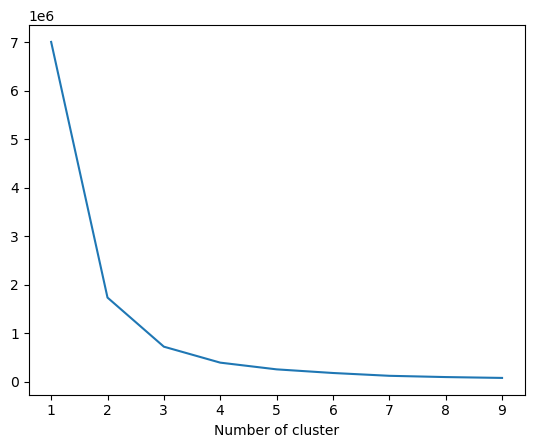

In [163]:
sse={}
df_recency_pre = df_user_pre[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters =k,max_iter=1000).fit(df_recency_pre)
    df_recency_pre["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [164]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(df_user_pre[['Recency']])
df_user_pre['RecencyCluster'] = kmeans.predict(df_user_pre[['Recency']])

In [165]:
def order_cluster(cluster_field_name, target_field_name,df, ascending):
    new_cluser_field_name  = 'new_pre' + cluster_field_name
    df_new_pre = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new_pre = df_new_pre.sort_values(by=target_field_name, ascending=ascending).reset_index(drop = True)
    df_new_pre['index'] = df_new_pre.index 
    df_final = pd.merge(df, df_new_pre[[cluster_field_name,'index']], on = cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis =1 )
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final 

In [166]:
df_user_pre = order_cluster('RecencyCluster', 'Recency', df_user_pre,False) 
df_user_pre.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,433.0,155.732102,15.190071,132.0,142.0,155.0,168.0,183.0
1,547.0,99.630713,13.786135,78.0,86.0,100.0,111.0,127.0
2,631.0,54.719493,12.432124,36.0,44.0,54.0,65.0,77.0
3,957.0,15.631139,10.055640,0.0,7.0,14.0,23.0,35.0


In [167]:
#Frequency
df_frequency = df_6m_pre.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head(5)

,CustomerID,Frequency
0,12747.0,50
1,12748.0,1210
2,12749.0,160
3,12821.0,6
4,12823.0,2


In [168]:
df_user_pre = pd.merge(df_user_pre, df_frequency,on = 'CustomerID')
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13047.0,57.0,13,3,115
1,14688.0,37.0,29,3,162
2,17809.0,69.0,29,3,20
3,15311.0,14.0,12,3,1061
4,14527.0,3.0,1,3,394


C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2566489506.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2566489506.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2566489506.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

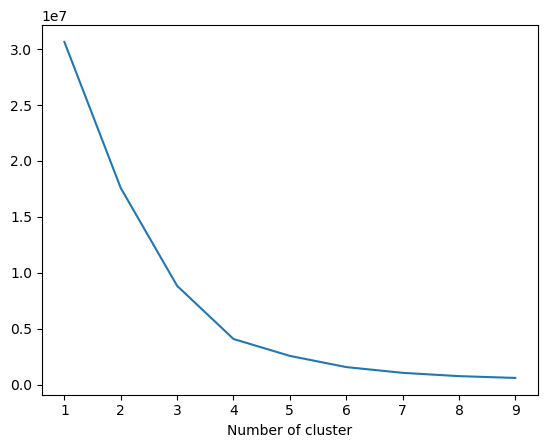

In [169]:
sse={}
df_recency_pre = df_user_pre[['Frequency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters =k,max_iter=1000).fit(df_recency_pre)
    df_recency_pre["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [170]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(df_user_pre[['Frequency']])
df_user_pre['FrequencyCluster'] = kmeans.predict(df_user_pre[['Frequency']])

In [171]:
df_user_pre.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2239.0,31.732023,26.036899,1.0,11.00,23.0,46.00,107.0
1,16.0,766.062500,260.797103,510.0,555.75,646.5,936.50,1251.0
2,312.0,182.439103,70.488211,108.0,130.00,160.0,212.25,450.0
3,1.0,3546.000000,NaN,3546.0,3546.00,3546.0,3546.00,3546.0


In [172]:
df_user_pre = order_cluster('FrequencyCluster', 'Frequency', df_user_pre, True) 

In [173]:
df_user_pre['Revenue'] = df_6m_pre['UnitPrice'] * df_6m_pre['Quantity']
df_revenue_pre = df_6m_pre.groupby('CustomerID').Revenue.sum().reset_index()

In [174]:
df_user_pre = pd.merge(df_user_pre, df_revenue_pre, on = 'CustomerID') 


In [176]:
df_user_pre = df_user_pre.drop(['Revenue_x'], axis =1)

In [177]:
new_column_names = {'Revenue_y': 'Revenue'}

# Rename the column using the dictionary
df_user_pre = df_user_pre.rename(columns=new_column_names)
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13047.0,57.0,13,3,115,1,1736.84
1,14688.0,37.0,29,3,162,1,2361.17
2,14527.0,3.0,1,3,394,1,2715.28
3,16029.0,12.0,7,3,127,1,17081.82
4,17511.0,21.0,14,3,450,1,37661.72


C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1842269977.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1842269977.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\1842269977.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

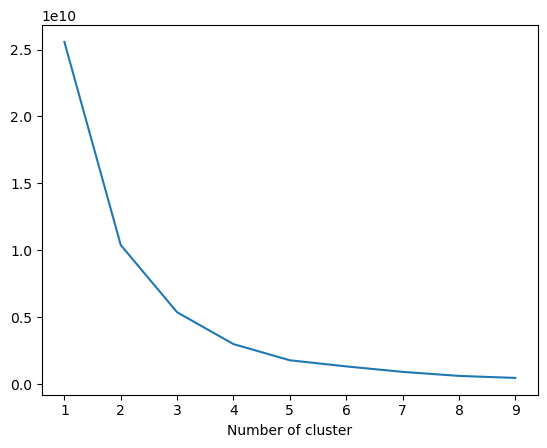

In [178]:
sse={}
df_recency_pre = df_user_pre[['Revenue']]
for k in range(1,10):
    kmeans = KMeans(n_clusters =k,max_iter=1000).fit(df_recency_pre)
    df_recency_pre["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [179]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(df_user_pre[['Revenue']])
df_user_pre['RevenueCluster'] = kmeans.predict(df_user_pre[['Revenue']])
df_user_pre = order_cluster('RevenueCluster', 'Revenue', df_user_pre, True) 
df_user_pre.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,2415.0,635.360862,618.311128,-4287.63,212.1850,406.480,866.6600,2906.31
1,136.0,5237.716699,2617.500448,2952.40,3282.0950,4419.950,5634.9350,13760.87
2,15.0,24656.247333,7716.951663,15847.56,17484.2400,23196.350,31386.6450,37934.22
3,2.0,76665.615000,17370.382136,64382.90,70524.2575,76665.615,82806.9725,88948.33


In [180]:
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13047.0,57.0,13,3,115,1,1736.84,0
1,14688.0,37.0,29,3,162,1,2361.17,0
2,14527.0,3.0,1,3,394,1,2715.28,0
3,17920.0,27.0,5,3,227,1,1511.06,0
4,17346.0,45.0,3,3,197,1,912.80,0


In [181]:
#OverallSegmentation
df_user_pre['OverallScore'] = df_user_pre['RecencyCluster'] + df_user_pre['FrequencyCluster'] + df_user_pre['RevenueCluster']
df_user_pre.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\2927833466.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,155.831776,19.292056,283.583902
1,100.363296,27.069288,440.578202
2,56.226876,36.654450,553.596442
3,19.951678,50.930201,873.742471
4,15.903226,158.688172,2505.300968
5,10.746835,213.721519,6291.990380
6,10.235294,541.764706,13786.231176
7,12.200000,591.600000,46209.390000
8,3.000000,3546.000000,16643.220000


In [182]:
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,13047.0,57.0,13,3,115,1,1736.84,0,4
1,14688.0,37.0,29,3,162,1,2361.17,0,4
2,14527.0,3.0,1,3,394,1,2715.28,0,4
3,17920.0,27.0,5,3,227,1,1511.06,0,4
4,17346.0,45.0,3,3,197,1,912.80,0,4


In [183]:
df_user_pre.groupby('OverallScore')['Recency'].count()

OverallScore
0    428
1    534
2    573
3    745
4    186
5     79
6     17
7      5
8      1
Name: Recency, dtype: int64

In [184]:
df_user_pre['Segment'] = 'Low Value' 
df_user_pre.loc[df_user_pre['OverallScore']>2,'Segment'] = 'Mid Value'
df_user_pre.loc[df_user_pre['OverallScore']>4,'Segment'] = 'Mid Value'

In [185]:
df_user_pre.head(5)

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13047.0,57.0,13,3,115,1,1736.84,0,4,Mid Value
1,14688.0,37.0,29,3,162,1,2361.17,0,4,Mid Value
2,14527.0,3.0,1,3,394,1,2715.28,0,4,Mid Value
3,17920.0,27.0,5,3,227,1,1511.06,0,4,Mid Value
4,17346.0,45.0,3,3,197,1,912.80,0,4,Mid Value


In [186]:
df_6m_pre.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,InvoiceYearMonth,Revenue,MinPurchase,MinPurchasedYearMonth,New_Existing
0,548331,22960,JAM MAKING SET WITH JARS,6,2011-03-30,4.25,13047.0,United Kingdom,2011,3,201103,25.5,2010-12-01 08:34:00,201012,New
1,548331,22722,SET OF 6 SPICE TINS PANTRY DESIGN,8,2011-03-30,3.95,13047.0,United Kingdom,2011,3,201103,31.6,2010-12-01 08:34:00,201012,New
2,548331,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-03-30,4.95,13047.0,United Kingdom,2011,3,201103,29.7,2010-12-01 08:34:00,201012,New
3,548331,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2011-03-30,1.25,13047.0,United Kingdom,2011,3,201103,15.0,2010-12-01 08:34:00,201012,New
4,548331,22274,FELTCRAFT DOLL EMILY,6,2011-03-30,2.95,13047.0,United Kingdom,2011,3,201103,17.7,2010-12-01 08:34:00,201012,New


In [187]:
#Create a dataframe with CustomerID & InvoiceDate
df_day_order = df_6m_pre[['CustomerID','InvoiceDate']]

In [188]:
df_day_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143772 entries, 0 to 143771
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   143772 non-null  float64
 1   InvoiceDate  143772 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [189]:
df_day_order['InvoiceDate'] = pd.to_datetime(df_6m_pre['InvoiceDate']).dt.date

C:\Users\LU VINH XUYEN\AppData\Local\Temp\ipykernel_3964\3266360363.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
df_day_order['InvoiceDay'] = pd.to_datetime(df_6m_pre['InvoiceDate']).dt.date

In [193]:
df_day_order = df_day_order.sort_values(['CustomerID','InvoiceDate'])
df_day_order.head(5)

,CustomerID,InvoiceDate,InvoiceDay
26096,12747.0,2011-03-01,2011-03-01
26097,12747.0,2011-03-01,2011-03-01
26098,12747.0,2011-03-01,2011-03-01
26099,12747.0,2011-03-01,2011-03-01
26100,12747.0,2011-03-01,2011-03-01


In [194]:
#Drop duplicates
df_day_order = df_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'], keep = 'first')

In [195]:
df_day_order.head(10)

,CustomerID,InvoiceDate,InvoiceDay
26096,12747.0,2011-03-01,2011-03-01
26108,12747.0,2011-05-05,2011-05-05
26117,12747.0,2011-05-25,2011-05-25
26131,12747.0,2011-06-28,2011-06-28
26139,12747.0,2011-08-22,2011-08-22
4232,12748.0,2011-03-08,2011-03-08
4258,12748.0,2011-03-11,2011-03-11
4295,12748.0,2011-03-18,2011-03-18
4339,12748.0,2011-03-21,2011-03-21
4343,12748.0,2011-03-24,2011-03-24


In [196]:
#Shifting last 3 purchase dates 
df_day_order['PrevInvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
df_day_order['T2InvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
df_day_order['T3InvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [197]:
df_day_order.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
26096,12747.0,2011-03-01,2011-03-01,NaN,NaN,NaN
26108,12747.0,2011-05-05,2011-05-05,2011-03-01,NaN,NaN
26117,12747.0,2011-05-25,2011-05-25,2011-05-05,2011-03-01,NaN
26131,12747.0,2011-06-28,2011-06-28,2011-05-25,2011-05-05,2011-03-01
26139,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05
4232,12748.0,2011-03-08,2011-03-08,NaN,NaN,NaN
4258,12748.0,2011-03-11,2011-03-11,2011-03-08,NaN,NaN
4295,12748.0,2011-03-18,2011-03-18,2011-03-11,2011-03-08,NaN
4339,12748.0,2011-03-21,2011-03-21,2011-03-18,2011-03-11,2011-03-08
4343,12748.0,2011-03-24,2011-03-24,2011-03-21,2011-03-18,2011-03-11


In [198]:
df_day_order['Daydiff'] = (df_day_order['InvoiceDay'] - df_day_order['PrevInvoiceDate']).dt.days
df_day_order['Daydiff2'] = (df_day_order['InvoiceDay'] - df_day_order['T2InvoiceDate']).dt.days
df_day_order['Daydiff3'] = (df_day_order['InvoiceDay'] - df_day_order['T3InvoiceDate']).dt.days
df_day_order.head(10)


,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,Daydiff,Daydiff2,Daydiff3
26096,12747.0,2011-03-01,2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN
26108,12747.0,2011-05-05,2011-05-05,2011-03-01,NaN,NaN,65.0,NaN,NaN
26117,12747.0,2011-05-25,2011-05-25,2011-05-05,2011-03-01,NaN,20.0,85.0,NaN
26131,12747.0,2011-06-28,2011-06-28,2011-05-25,2011-05-05,2011-03-01,34.0,54.0,119.0
26139,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05,55.0,89.0,109.0
4232,12748.0,2011-03-08,2011-03-08,NaN,NaN,NaN,NaN,NaN,NaN
4258,12748.0,2011-03-11,2011-03-11,2011-03-08,NaN,NaN,3.0,NaN,NaN
4295,12748.0,2011-03-18,2011-03-18,2011-03-11,2011-03-08,NaN,7.0,10.0,NaN
4339,12748.0,2011-03-21,2011-03-21,2011-03-18,2011-03-11,2011-03-08,3.0,10.0,13.0
4343,12748.0,2011-03-24,2011-03-24,2011-03-21,2011-03-18,2011-03-11,3.0,6.0,13.0


In [211]:
df_days_diff = df_day_order.groupby('CustomerID').agg({'Daydiff':['mean','std']}).reset_index()

In [212]:
df_days_diff.head(10)

CustomerID     Daydiff           
                    mean        std
0    12747.0   43.500000  20.305993
1    12748.0    3.723404   3.083632
2    12749.0   25.000000  30.099834
3    12821.0         NaN        NaN
4    12823.0  127.000000        NaN
5    12826.0   10.000000        NaN
6    12828.0   18.000000        NaN
7    12830.0   12.333333   4.618802
8    12831.0         NaN        NaN
9    12833.0         NaN        NaN

In [214]:
df_days_diff.columns = ['CustomerID','DayDiffMean','DayDiffStd']
df_days_diff.head(10)

,CustomerID,DayDiffMean,DayDiffStd
0,12747.0,43.500000,20.305993
1,12748.0,3.723404,3.083632
2,12749.0,25.000000,30.099834
3,12821.0,NaN,NaN
4,12823.0,127.000000,NaN
5,12826.0,10.000000,NaN
6,12828.0,18.000000,NaN
7,12830.0,12.333333,4.618802
8,12831.0,NaN,NaN
9,12833.0,NaN,NaN


In [215]:
del df_day_diff #Delete one dataframe

In [216]:
df_day_order_last = df_day_order.drop_duplicates(subset = ['CustomerID'],keep='last')
df_day_order_last.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,Daydiff,Daydiff2,Daydiff3
26139,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05,55.0,89.0,109.0
5428,12748.0,2011-08-30,2011-08-30,2011-08-25,2011-08-24,2011-08-17,5.0,6.0,13.0
124229,12749.0,2011-08-18,2011-08-18,2011-08-11,2011-08-01,2011-05-23,7.0,17.0,87.0
123729,12821.0,2011-05-09,2011-05-09,NaN,NaN,NaN,NaN,NaN,NaN
84331,12823.0,2011-08-04,2011-08-04,2011-03-30,NaN,NaN,127.0,NaN,NaN
42786,12826.0,2011-06-24,2011-06-24,2011-06-14,NaN,NaN,10.0,NaN,NaN
140067,12828.0,2011-08-19,2011-08-19,2011-08-01,NaN,NaN,18.0,NaN,NaN
134221,12830.0,2011-07-28,2011-07-28,2011-07-21,2011-07-06,2011-06-21,7.0,22.0,37.0
103727,12831.0,2011-03-22,2011-03-22,NaN,NaN,NaN,NaN,NaN,NaN
137706,12833.0,2011-07-17,2011-07-17,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df_day_order_last = df_day_order_last.dropna()

In [218]:
df_day_order_last = pd.merge(df_day_order_last,df_days_diff, on = 'CustomerID') 

In [220]:
df_day_order_last.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,Daydiff,Daydiff2,Daydiff3,DayDiffMean,DayDiffStd
0,12747.0,2011-08-22,2011-08-22,2011-06-28,2011-05-25,2011-05-05,55.0,89.0,109.0,43.500000,20.305993
1,12748.0,2011-08-30,2011-08-30,2011-08-25,2011-08-24,2011-08-17,5.0,6.0,13.0,3.723404,3.083632
2,12749.0,2011-08-18,2011-08-18,2011-08-11,2011-08-01,2011-05-23,7.0,17.0,87.0,25.000000,30.099834
3,12830.0,2011-07-28,2011-07-28,2011-07-21,2011-07-06,2011-06-21,7.0,22.0,37.0,12.333333,4.618802
4,12839.0,2011-08-18,2011-08-18,2011-07-29,2011-07-05,2011-06-09,20.0,44.0,70.0,32.800000,26.166773
5,12840.0,2011-07-19,2011-07-19,2011-06-10,2011-05-09,2011-05-05,39.0,71.0,75.0,16.600000,17.558474
6,12841.0,2011-08-25,2011-08-25,2011-08-03,2011-07-17,2011-07-03,22.0,39.0,53.0,21.375000,8.716774
7,12843.0,2011-07-03,2011-07-03,2011-06-24,2011-06-15,2011-06-06,9.0,18.0,27.0,17.500000,14.963288
8,12853.0,2011-08-24,2011-08-24,2011-07-28,2011-05-09,2011-04-14,27.0,107.0,132.0,44.000000,31.192948
9,12877.0,2011-08-07,2011-08-07,2011-06-15,2011-05-23,2011-05-05,53.0,76.0,94.0,26.600000,18.063776


In [221]:
df_user_pre = pd.merge(df_user_pre, df_day_order_last[['CustomerID','Daydiff','Daydiff2','Daydiff3','DayDiffMean','DayDiffStd']])

In [223]:
#Grouping the label
df_class_pre = df_user_pre.copy()

In [224]:
df_class_pre = pd.get_dummies(df_class_pre)

In [225]:
df_class_pre['NextPurchaseDayRange'] = 2
df_class_pre.loc[df_class_pre.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1 
df_class_pre.loc[df_class_pre.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

In [226]:
df_class_pre.NextPurchaseDayRange.value_counts()

0    298
1    212
2    113
Name: NextPurchaseDayRange, dtype: int64

In [227]:
df_class_pre.NextPurchaseDayRange.value_counts()/len(df_user_pre)*100

0    47.833066
1    34.028892
2    18.138042
Name: NextPurchaseDayRange, dtype: float64

<AxesSubplot:>

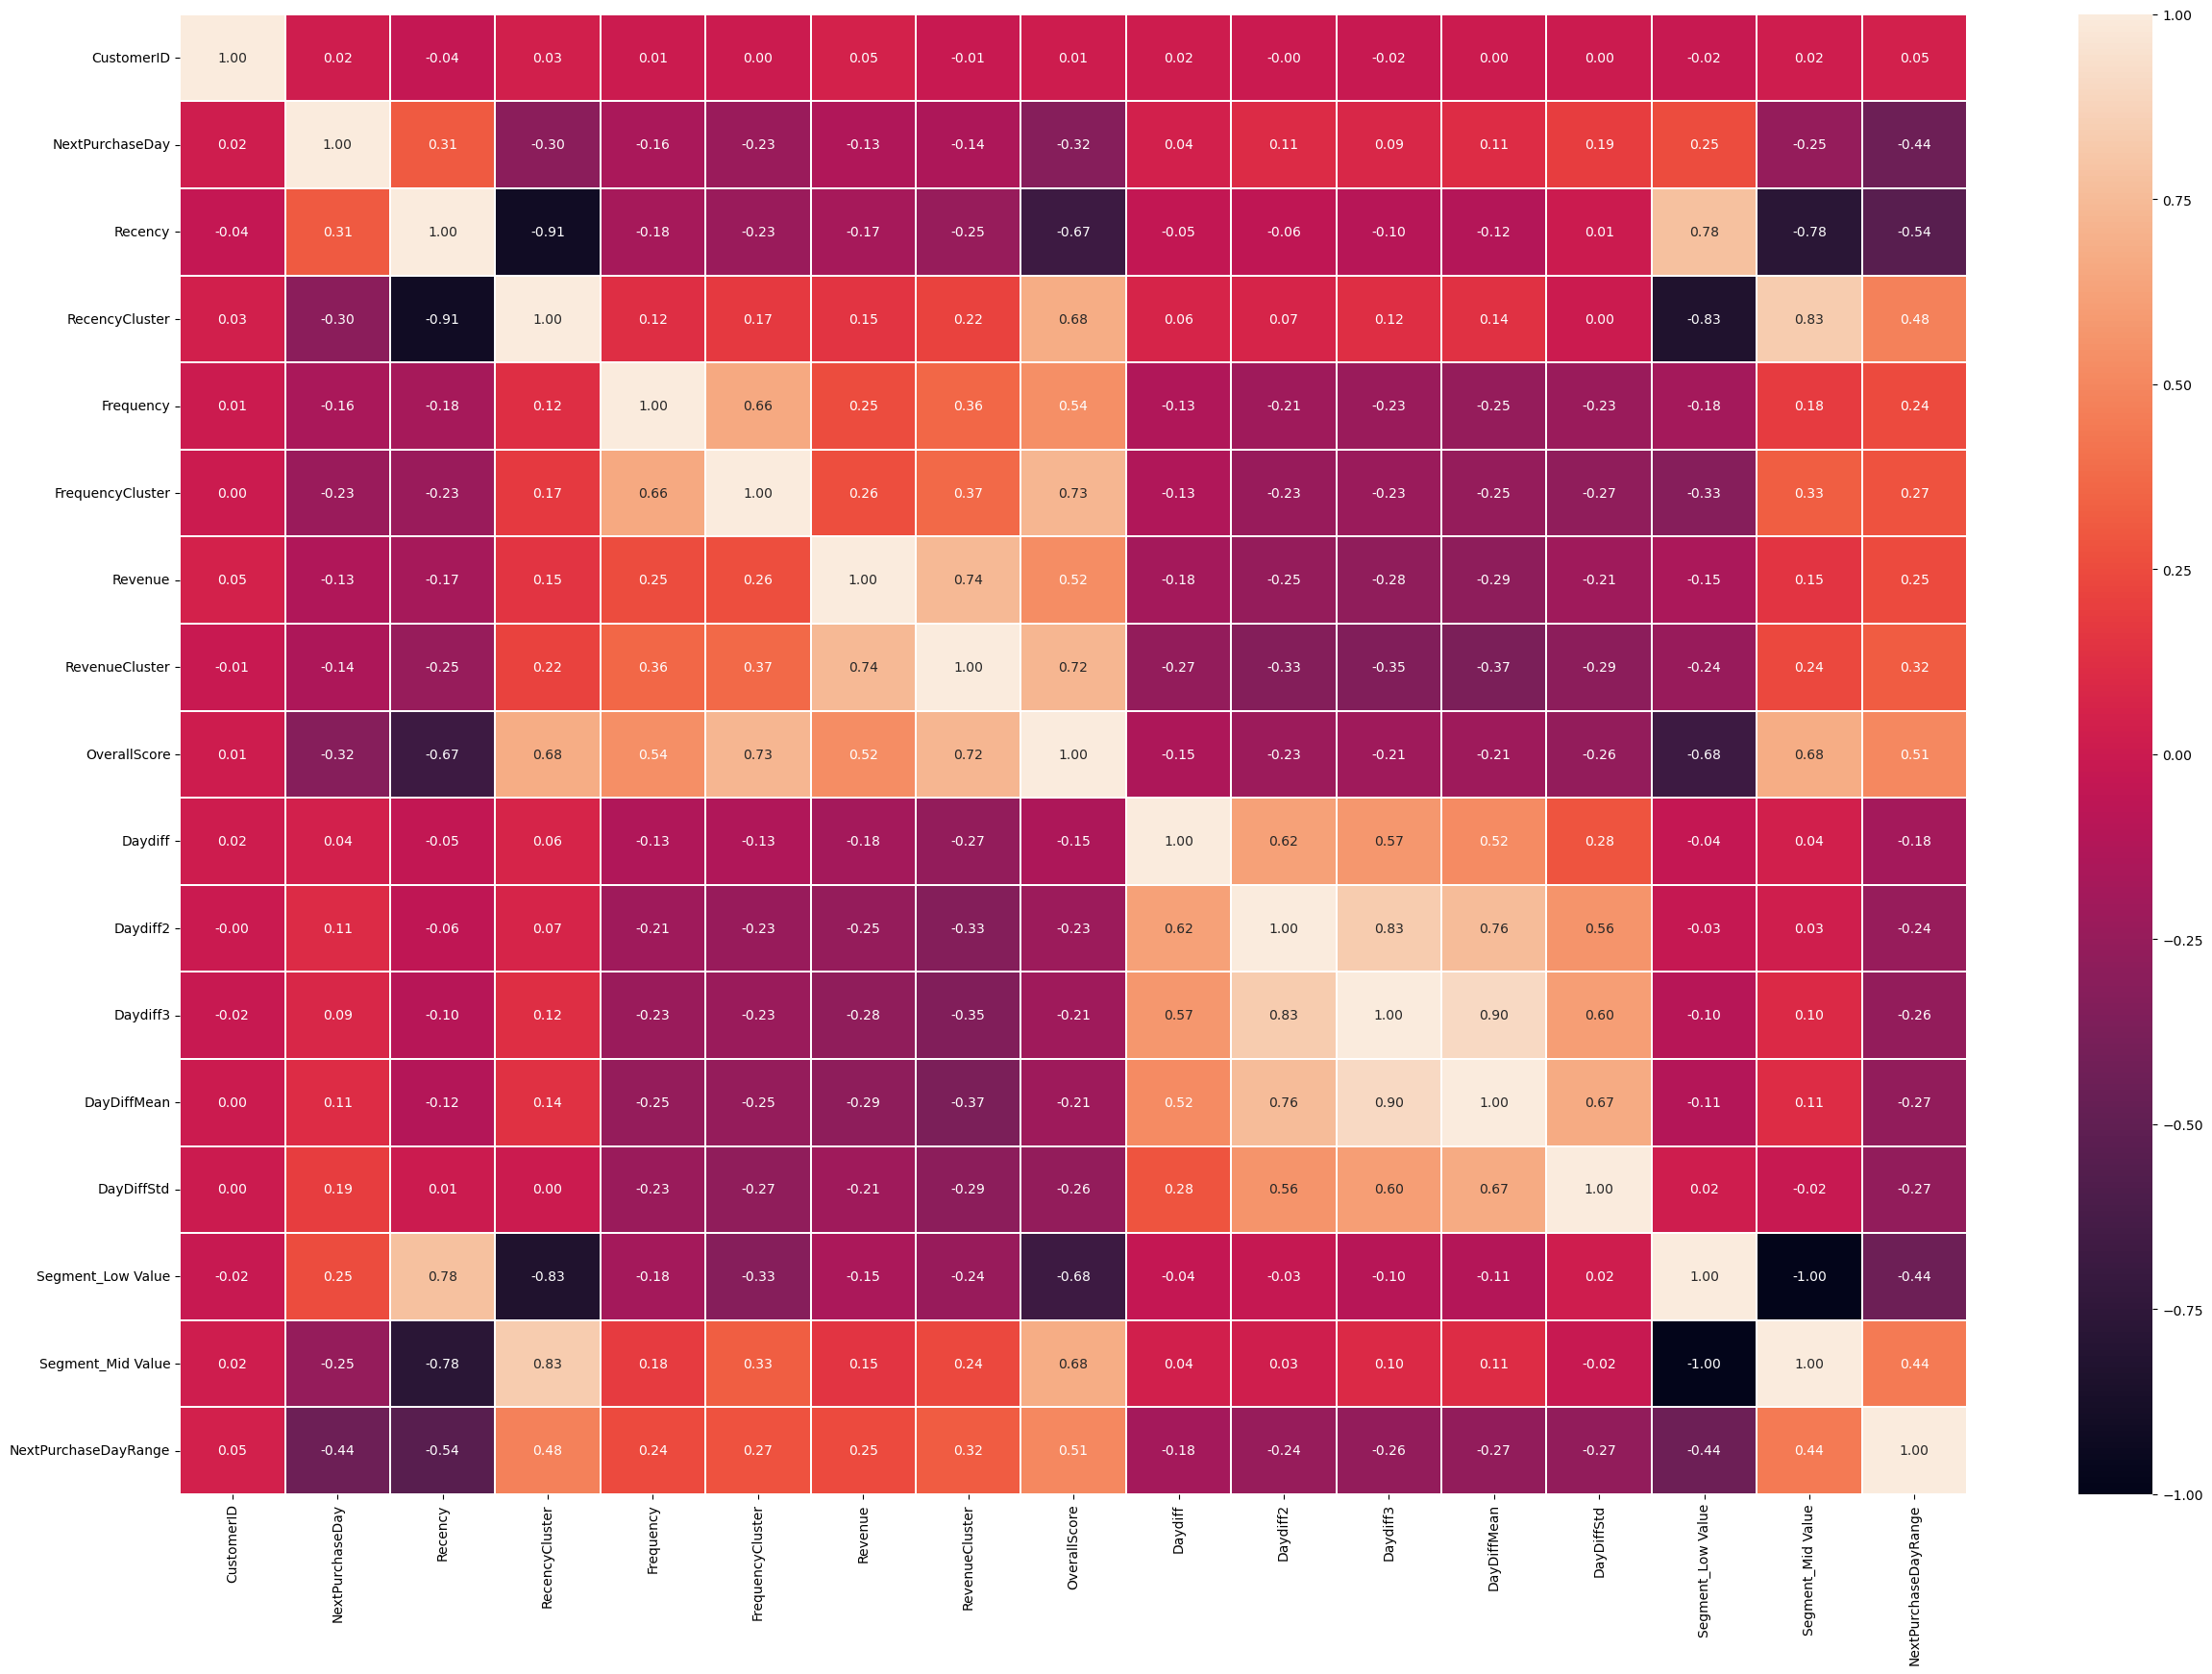

In [228]:
## See the correlations 
corr = df_class_pre[df_class_pre.columns].corr()
plt.figure(figsize = (30,20)) 
sns.heatmap(corr, annot = True , linewidth =0.2,fmt = ".2f")

In [229]:
df_class_pre = df_class_pre.drop('NextPurchaseDay', axis =1)

In [232]:
#Import libraries for predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split 

In [233]:
X, y = df_class_pre.drop('NextPurchaseDayRange', axis = 1), df_class_pre.NextPurchaseDayRange

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 44 )

In [236]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("DTree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))



In [237]:
for name, model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model, X_train, y_train, cv= kfold, scoring = "accuracy")
    print(name,cv_result)

C:\Users\LU VINH XUYEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\LU VINH XUYEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR [0.64658635 0.58634538]
NB [0.62650602 0.61445783]
RF [0.63453815 0.59036145]
DTree [0.562249   0.53413655]
XGB [0.60240964 0.57028112]
KNN [0.52610442 0.48594378]


C:\Users\LU VINH XUYEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\LU VINH XUYEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

In [238]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train) 

In [239]:
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test))) 

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on training set: 0.50


In [240]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.59      0.74      0.65        50
           1       0.42      0.31      0.35        49
           2       0.42      0.42      0.42        26

    accuracy                           0.50       125
   macro avg       0.48      0.49      0.48       125
weighted avg       0.49      0.50      0.49       125



In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(),param_grid = param_test1, scoring = 'accuracy', n_jobs = -1, cv =2)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.5883534136546185)

In [243]:
xgb_model =xgb.XGBClassifier(max_depth =3, min_child_weight =5).fit(X_train, y_train) 

In [244]:
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test))) 

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on training set: 0.51


In [245]:
xgb_model =xgb.XGBClassifier(max_depth =7, min_child_weight =3).fit(X_train, y_train) 

In [246]:
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test))) 

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on training set: 0.54


In [247]:
y_pred = xgb_model.predict(X_test)
len(y_pred)

125

In [248]:
y_pred

array([0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0,
       2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0], dtype=int64)

In [249]:
X_test['predict_NextPurchaseRange'] = y_pred 

In [250]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68        50
           1       0.47      0.33      0.39        49
           2       0.48      0.50      0.49        26

    accuracy                           0.54       125
   macro avg       0.52      0.54      0.52       125
weighted avg       0.53      0.54      0.53       125



In [252]:
X_test
#For example :
#CustomerID 13268 had predict_NextPurchaseRange = 0 => Next Purchase Range of this customer is more than 50 days
# Follow rule in code [225]

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Daydiff,Daydiff2,Daydiff3,DayDiffMean,DayDiffStd,Segment_Low Value,Segment_Mid Value,predict_NextPurchaseRange
133,13268.0,69,2,305,1,2111.40,0,3,29.0,50.0,72.0,19.600000,6.767570,0,1,0
286,15129.0,6,3,60,0,2441.33,0,3,20.0,31.0,70.0,21.285714,14.896468,0,1,0
153,14696.0,19,3,58,0,863.56,0,3,64.0,68.0,123.0,41.000000,32.357379,0,1,0
616,14796.0,7,3,586,2,3675.61,1,6,30.0,44.0,65.0,24.714286,10.078265,0,1,1
593,18172.0,21,3,75,0,3298.59,1,4,6.0,13.0,27.0,16.500000,13.659115,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,13319.0,13,3,209,1,4060.46,1,5,7.0,21.0,35.0,14.272727,11.028063,0,1,2
190,13769.0,13,3,60,0,1086.47,0,3,9.0,41.0,94.0,23.666667,17.546130,0,1,2
516,15078.0,5,3,211,1,4429.99,1,5,7.0,17.0,30.0,14.666667,10.316213,0,1,2
270,16419.0,12,3,35,0,706.82,0,3,16.0,56.0,161.0,40.750000,45.617066,0,1,0
